<a href="https://colab.research.google.com/github/Yunfan2020/10-30/blob/main/baseline_oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
#os.chdir('/content/gdrive/MyDrive/670/team_proj')#
os.chdir('/content/gdrive/Shareddrives/SI670')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data=pd.read_csv('data.csv')
data=data.iloc[:,1:]

In [4]:
data.head()

,True_False,Rain_ID,Intensity2,month,Season,Sewer_ID,Drainage_type,df.Pop_den,Num_edges_pre,Road_width_mean,...,Net_den,Net_area_den,Alpha,Beta,Gama,ETA,Theta,Sewer_Pre_impv,Sewer_CB_pre,Hours
0,1,105,0.115,8,Summer,744,Direct Drainage/Other,0.002781,0.00009,9.943902,...,0.009902,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,54
1,1,163,0.010,6,Summer,744,Direct Drainage/Other,0.002781,0.00009,9.943902,...,0.009902,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,20
2,1,312,0.003,7,Summer,744,Direct Drainage/Other,0.002781,0.00009,9.943902,...,0.009902,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,23
3,1,316,0.015,8,Summer,744,Direct Drainage/Other,0.002781,0.00009,9.943902,...,0.009902,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,23
4,1,310,0.033,7,Summer,744,Direct Drainage/Other,0.002781,0.00009,9.943902,...,0.009902,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,54


In [5]:
data['True_False'].value_counts() 

0    524174
1     18698
Name: True_False, dtype: int64

In [6]:
18698/len(data) #only 3% are True? (not sure 0=False, 1=True)

0.0344427415670729

In [7]:
data.drop_duplicates()['True_False'].value_counts()

0    524174
1      6850
Name: True_False, dtype: int64

In [8]:
6850/(524174+6850) #after dropping duplicates, only 1.2% are true. 

0.012899605290909638

## EDA

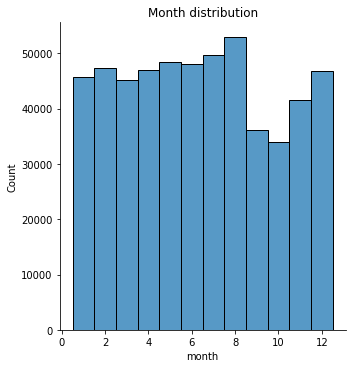

In [9]:
#Yunfan - your plots here
sns.displot(data, x="month", discrete=True).set(title = 'Month distribution')

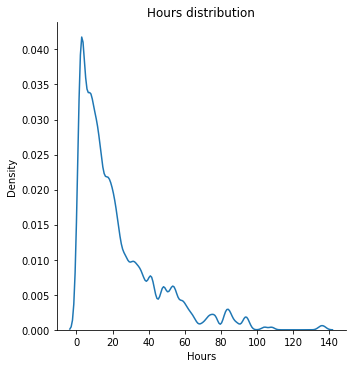

In [10]:
sns.displot(data, x="Hours", kind="kde").set(title = 'Hours distribution')

Text(0.5, 1.0, 'Correlation Heatmap')

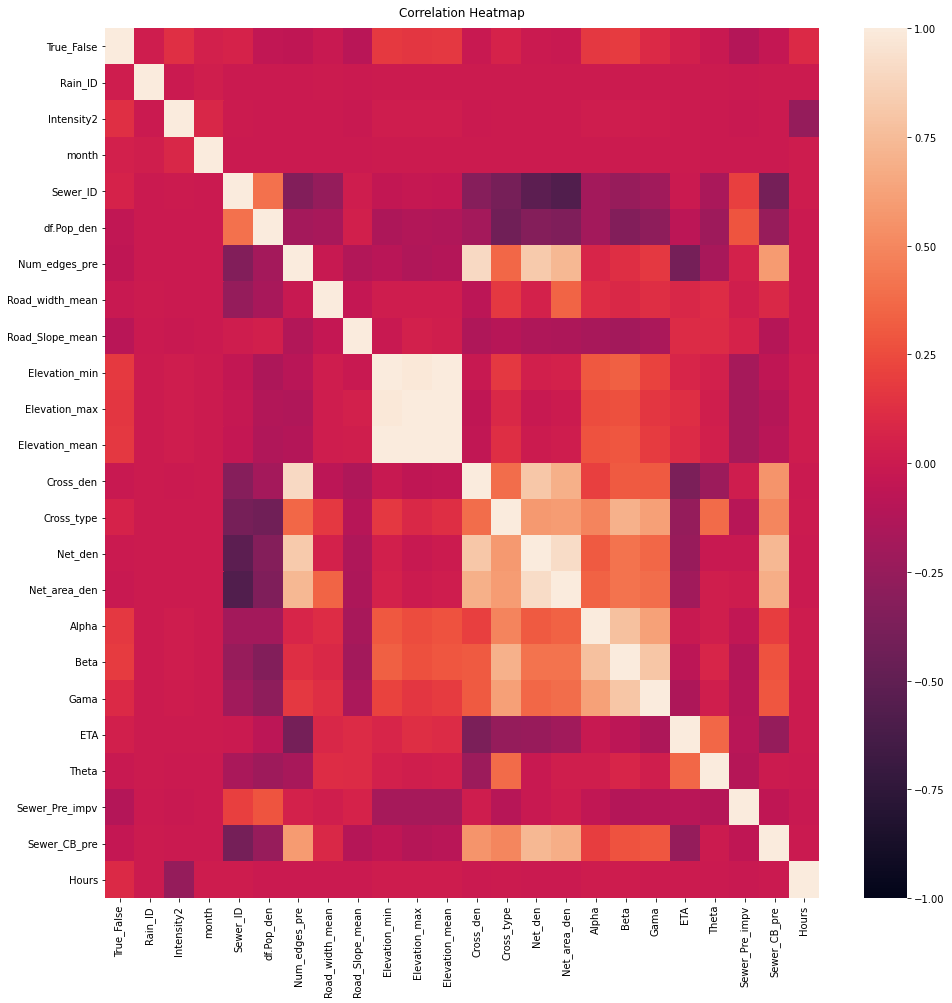

In [11]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

## Adding a feature - count of reports grouped by sewer_ID

In [12]:
sewer_grouped=data.groupby(['Sewer_ID']).sum()['True_False']
sewer_grouped

Sewer_ID
0       5
1       4
2       1
3       1
4       9
       ..
812     0
814     0
815     0
816     0
817    32
Name: True_False, Length: 733, dtype: int64

In [13]:
new_df=data.merge(sewer_grouped, left_on='Sewer_ID', right_on='Sewer_ID') #"Severity"

In [14]:
new_df #wet and dry season => 4,5,6,7 are rainy season

,True_False_x,Rain_ID,Intensity2,month,Season,Sewer_ID,Drainage_type,df.Pop_den,Num_edges_pre,Road_width_mean,...,Net_area_den,Alpha,Beta,Gama,ETA,Theta,Sewer_Pre_impv,Sewer_CB_pre,Hours,True_False_y
0,1,105,0.115,8,Summer,744,Direct Drainage/Other,0.002781,0.000090,9.943902,...,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,54,7087
1,1,163,0.010,6,Summer,744,Direct Drainage/Other,0.002781,0.000090,9.943902,...,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,20,7087
2,1,312,0.003,7,Summer,744,Direct Drainage/Other,0.002781,0.000090,9.943902,...,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,23,7087
3,1,316,0.015,8,Summer,744,Direct Drainage/Other,0.002781,0.000090,9.943902,...,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,23,7087
4,1,310,0.033,7,Summer,744,Direct Drainage/Other,0.002781,0.000090,9.943902,...,0.097857,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,54,7087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542867,0,393,0.065,8,Summer,588,Direct Drainage/Other,4.177504,0.000012,21.336000,...,0.007180,0.00000,0.000000,0.000000,27.805970,0.00000,0.999602,0.000030,2,0
542868,0,535,0.023,8,Summer,588,Direct Drainage/Other,4.177504,0.000012,21.336000,...,0.007180,0.00000,0.000000,0.000000,27.805970,0.00000,0.999602,0.000030,12,0
542869,0,539,0.044,9,Auturmn,588,Direct Drainage/Other,4.177504,0.000012,21.336000,...,0.007180,0.00000,0.000000,0.000000,27.805970,0.00000,0.999602,0.000030,5,0
542870,0,788,0.050,11,Auturmn,588,Direct Drainage/Other,4.177504,0.000012,21.336000,...,0.007180,0.00000,0.000000,0.000000,27.805970,0.00000,0.999602,0.000030,8,0


In [15]:
new_df=new_df.drop_duplicates() 

In [16]:
new_df['True_False_x'].value_counts() #sanity check done

0    524174
1      6850
Name: True_False_x, dtype: int64

In [17]:
new_df.columns

Index(['True_False_x', 'Rain_ID', 'Intensity2', 'month', 'Season', 'Sewer_ID',
       'Drainage_type', 'df.Pop_den', 'Num_edges_pre', 'Road_width_mean',
       'Road_Slope_mean', 'Elevation_min', 'Elevation_max', 'Elevation_mean',
       'Cross_den', 'Cross_type', 'Net_den', 'Net_area_den', 'Alpha', 'Beta',
       'Gama', 'ETA', 'Theta', 'Sewer_Pre_impv', 'Sewer_CB_pre', 'Hours',
       'True_False_y'],
      dtype='object')

In [18]:
new_df=new_df.rename(columns={'True_False_x':'True_False','True_False_y':'Flood_report_cnt'})

In [19]:
#mapping month to rainy/dry season
new_df['wet_dry_season']=new_df['month'].apply(lambda x: 'wet' if x in [4,5,6,7] else 'dry')
new_df['wet_dry_season']

0         dry
1         wet
2         wet
3         dry
4         wet
         ... 
542867    dry
542868    dry
542869    dry
542870    dry
542871    dry
Name: wet_dry_season, Length: 531024, dtype: object

In [20]:
X=new_df.drop(columns=['True_False','month','Season'])
y=new_df['True_False']

In [21]:
X.head()

,Rain_ID,Intensity2,Sewer_ID,Drainage_type,df.Pop_den,Num_edges_pre,Road_width_mean,Road_Slope_mean,Elevation_min,Elevation_max,...,Alpha,Beta,Gama,ETA,Theta,Sewer_Pre_impv,Sewer_CB_pre,Hours,Flood_report_cnt,wet_dry_season
0,105,0.115,744,Direct Drainage/Other,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,...,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,54,7087,dry
1,163,0.010,744,Direct Drainage/Other,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,...,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,20,7087,wet
2,312,0.003,744,Direct Drainage/Other,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,...,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,23,7087,wet
3,316,0.015,744,Direct Drainage/Other,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,...,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,23,7087,dry
4,310,0.033,744,Direct Drainage/Other,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,...,0.20037,1.400493,0.466946,109.505883,157.94325,0.747251,0.000114,54,7087,wet


In [22]:
X.isnull().sum()

Rain_ID             0
Intensity2          0
Sewer_ID            0
Drainage_type       0
df.Pop_den          0
Num_edges_pre       0
Road_width_mean     0
Road_Slope_mean     0
Elevation_min       0
Elevation_max       0
Elevation_mean      0
Cross_den           0
Cross_type          0
Net_den             0
Net_area_den        0
Alpha               0
Beta                0
Gama                0
ETA                 0
Theta               0
Sewer_Pre_impv      0
Sewer_CB_pre        0
Hours               0
Flood_report_cnt    0
wet_dry_season      0
dtype: int64

## Baseline(just XGboost etc without any manipulation)

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

In [24]:
X.dtypes

Rain_ID               int64
Intensity2          float64
Sewer_ID              int64
Drainage_type        object
df.Pop_den          float64
Num_edges_pre       float64
Road_width_mean     float64
Road_Slope_mean     float64
Elevation_min       float64
Elevation_max       float64
Elevation_mean      float64
Cross_den           float64
Cross_type          float64
Net_den             float64
Net_area_den        float64
Alpha               float64
Beta                float64
Gama                float64
ETA                 float64
Theta               float64
Sewer_Pre_impv      float64
Sewer_CB_pre        float64
Hours                 int64
Flood_report_cnt      int64
wet_dry_season       object
dtype: object

In [25]:
# X['Season'].value_counts()

In [26]:
X['Drainage_type'].value_counts()

Combined                 253400
Separate                 154212
Direct Drainage/Other    123412
Name: Drainage_type, dtype: int64

In [27]:
#one hot encoding
X_enc=pd.get_dummies(X, columns = ['Drainage_type', 'wet_dry_season'])
X_enc.head(7)

,Rain_ID,Intensity2,Sewer_ID,df.Pop_den,Num_edges_pre,Road_width_mean,Road_Slope_mean,Elevation_min,Elevation_max,Elevation_mean,...,Theta,Sewer_Pre_impv,Sewer_CB_pre,Hours,Flood_report_cnt,Drainage_type_Combined,Drainage_type_Direct Drainage/Other,Drainage_type_Separate,wet_dry_season_dry,wet_dry_season_wet
0,105,0.115,744,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,71.883707,...,157.94325,0.747251,0.000114,54,7087,0,1,0,1,0
1,163,0.010,744,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,71.883707,...,157.94325,0.747251,0.000114,20,7087,0,1,0,0,1
2,312,0.003,744,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,71.883707,...,157.94325,0.747251,0.000114,23,7087,0,1,0,0,1
3,316,0.015,744,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,71.883707,...,157.94325,0.747251,0.000114,23,7087,0,1,0,1,0
4,310,0.033,744,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,71.883707,...,157.94325,0.747251,0.000114,54,7087,0,1,0,0,1
5,311,0.063,744,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,71.883707,...,157.94325,0.747251,0.000114,3,7087,0,1,0,0,1
6,375,0.040,744,0.002781,0.00009,9.943902,0.065621,68.067146,75.666565,71.883707,...,157.94325,0.747251,0.000114,61,7087,0,1,0,0,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [30]:
xgb.score(X_train,y_train)

0.9893884218926178

In [31]:
xgb.score(X_test,y_test) #guess it it predicting everything to the majority class

0.9895296831599265

In [32]:
y_pred=xgb.predict(X_test)

In [33]:
print(f1_score(y_test, y_pred, average='binary'))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred)) #recall is bad(somewhat expected)

0.34818288393903873
0.8839285714285714
0.2167883211678832


## Oversampling(handling imbalanced problem)

In [34]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

#official doc- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [35]:
X.dtypes

Rain_ID               int64
Intensity2          float64
Sewer_ID              int64
Drainage_type        object
df.Pop_den          float64
Num_edges_pre       float64
Road_width_mean     float64
Road_Slope_mean     float64
Elevation_min       float64
Elevation_max       float64
Elevation_mean      float64
Cross_den           float64
Cross_type          float64
Net_den             float64
Net_area_den        float64
Alpha               float64
Beta                float64
Gama                float64
ETA                 float64
Theta               float64
Sewer_Pre_impv      float64
Sewer_CB_pre        float64
Hours                 int64
Flood_report_cnt      int64
wet_dry_season       object
dtype: object

In [36]:
X_enc=pd.get_dummies(X, columns = ['wet_dry_season', 'Drainage_type'])
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
sm = SMOTE(random_state=0, n_jobs=8, sampling_strategy='minority')
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
Counter(y_train_resampled)

Counter({0: 419339, 1: 419339})

In [38]:
xgb_over=XGBClassifier()
xgb_over.fit(X_train_resampled, y_train_resampled)

XGBClassifier()

Should do some hyperparameter tuning(XGBoost)

In [39]:
y_pred=xgb_over.predict(X_test)
print(f1_score(y_test, y_pred, average='binary'))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.19218804009678533
0.10899823564007058
0.8116788321167884


No big difference in F1 score. 
Precision and recall => almost reversed

## XGBoost Tuning after oversampling

* TODO: make new column(groupby) => groupby avg, and then join I guess
* decide the range of xgboost param tuning and then do gridsearch
* should figure out if we can use fp rate as a eval on XGBoost
* find the reason why precision and recall are reversed(considering the def of each)

In [40]:
#Yunfan -your Gridsearch CV here

# Models




In [41]:
#use X_train_resampled, y_train_resampled for training
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

Logistic Regression

In [42]:
# Tune Logistic Regression Model
lg_over = LogisticRegression(random_state=2022)
param_grid = {
            'fit_intercept': [True, False], 
            'solver': ['newton-cg', 'liblinear'],
            'max_iter': [1000],
             }
lg_over_grid_search = GridSearchCV(estimator=lg_over,
                              param_grid=param_grid,
                              scoring='recall',
                              n_jobs=-1)
lg_over_grid_search.fit(X_train_resampled, y_train_resampled) 

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


GridSearchCV(estimator=LogisticRegression(random_state=2022), n_jobs=-1,
             param_grid={'fit_intercept': [True, False], 'max_iter': [1000],
                         'solver': ['newton-cg', 'liblinear']},
             scoring='recall')

In [43]:
lg_over_grid_search.best_params_

{'fit_intercept': False, 'max_iter': 1000, 'solver': 'newton-cg'}

In [44]:
y_pred=lg_over_grid_search.predict(X_test)
print(f1_score(y_test, y_pred, average='binary'))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.18647031753336402
0.10668773038441284
0.7394160583941606


SVM

In [ ]:
# Took so loooong until the timeout 
# svm_over = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# svm_over.fit(X_train_resampled, y_train_resampled)

Random Forest

In [46]:
rf_over = RandomForestClassifier()
rf_over.fit(X_train_resampled, y_train_resampled) 

RandomForestClassifier()

In [47]:
y_pred=rf_over.predict(X_test)
print(f1_score(y_test, y_pred, average='binary'))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.3520374081496326
0.32450738916256155
0.38467153284671535


In [ ]:
# Tune random forest model
rf_over = RandomForestClassifier(random_state=0)
param_grid = {
        'n_estimators': [5, 10, 15, 20, 25, 30, 40, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth':  [2, 4, 6, 8, 10, None],    
        }
rf_over_grid_search = GridSearchCV(estimator=rf_over,
                              param_grid=param_grid,
                              scoring='recall',
                              n_jobs=-1)
rf_over_grid_search.fit(X_train_resampled, y_train_resampled) 

In [ ]:
# y_pred=rf_over_grid_search.predict(X_test)
# print(f1_score(y_test, y_pred, average='binary'))
# print(precision_score(y_test,y_pred))
# print(recall_score(y_test,y_pred))

MLP

In [ ]:
# Tune MLP Model
mlp_over = MLPClassifier()
param_grid = {
            'activation': ['logistic', 'tanh', 'relu'],
            'alpha': [0.0001, 0.001, 0.01, 1, 10],
            'max_iter': [1000]
            }
mlp_over_grid_search = GridSearchCV(estimator=mlp_over,
                              param_grid=param_grid,
                              scoring='recall',
                              n_jobs=-1)
mlp_over_grid_search.fit(X_train_resampled, y_train_resampled) 

In [ ]:
y_pred=mlp_over_grid_search.predict(X_test)
print(f1_score(y_test, y_pred, average='binary'))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

XGBoost

In [ ]:
# Tune XGBoost Model
xgb_over = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=2022
)
param_grid = {
            'max_depth': range(2, 10, 1),
            'n_estimators': range(60, 220, 40),
            'learning_rate': [0.1, 0.01, 0.05]
            }
xgb_over_grid_search = GridSearchCV(estimator=xgb_over,
                              param_grid=param_grid,
                              scoring='recall',
                              n_jobs=-1)
xgb_over_grid_search.fit(X_train_resampled, y_train_resampled) 

In [ ]:
y_pred=xgb_over_grid_search.predict(X_test)
print(f1_score(y_test, y_pred, average='binary'))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))